# Linear regression
The followning code presents a template for implementing linear regression for a single variable.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression # for new sklearn version
%matplotlib inline

In [2]:
#warning - i had to change the folder here cause google colab which i use for ipynb didnt work
sizes = np.loadtxt('flat.areas').reshape((26,1)) #load the vector of flat areas
prices = np.loadtxt('flat.prices').reshape((26,1)) #load the vector of flat prices
samples_cnt = len(prices) #count the number of examples

## Task 1

Complete the following `predict` function so that, given a list of features and the weights in linear regression. Assume that `weight1` represents the slope, whereas `weight0` is the intercept.

In [3]:
def predict(features, weight0, weight1):
    return [x * weight1 + weight0 for x in features]

Let's test it!

In [4]:
feature = [1, 2, 3]
expected = [10, 20, 30]
predicted = predict(np.array(feature), 0, 10)

assert (np.array(predicted) == np.array(expected)).all()

In [5]:
feature = [1, 2, 3]
expected = [11, 12, 13]
predicted = predict(np.array(feature), 10, 1)

assert (np.array(predicted) == np.array(expected)).all()

## Task 2

Complete the following cell of code so it iteratively improves the weights of the model to find the best line mapping `sizes` to `prices`. Use the gradient descent algorithm presented during the lecture.

In [6]:
weight0 = 0.0 #a0
weight1 = 0.0 #a1
learning_rate = 0.0001
maxIteration = 10000 # number of iterations
#prices - y, sizes - x
for i in range(maxIteration):
  weight1_deriv = 0
  weight0_deriv = 0
  for i in range(len(sizes)):
    weight1_deriv += sizes[i] * (weight1*sizes[i] + weight0 - prices[i])
    weight0_deriv += weight1*sizes[i] + weight0 - prices[i]
  weight1 -= (weight1_deriv / float(len(sizes))) * learning_rate
  weight0 -= (weight0_deriv / float(len(sizes))) * learning_rate

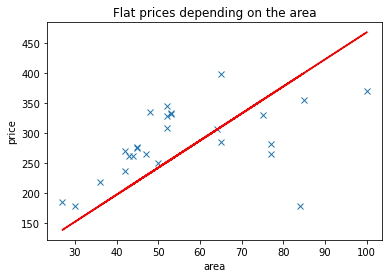

Computed weights -> w0: [17.68636871] w1: [4.50094378]


In [7]:
predicted_prices = predict(sizes, weight0, weight1)

plt.plot(sizes, prices, "x")
plt.plot(sizes, predicted_prices, "r-")
plt.title('Flat prices depending on the area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()
print("Computed weights -> w0:", weight0, "w1:", weight1)

## Task 3

The following piece of code draws charts of two different cost functions. The first chart presents mean squared error, the second one some arbitrary function.

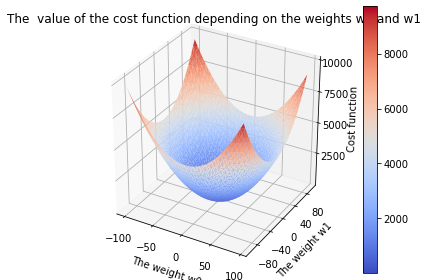

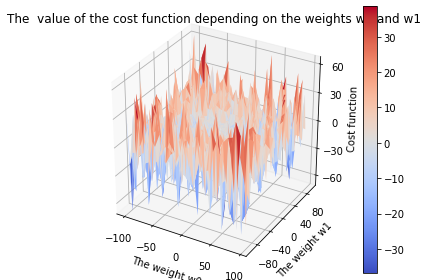

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function):
	points = []
	for i in w0_values:
	    for j in w1_values:
	        points.append([i, j, loss_function(sizes_transformed, prices_transformed, i,j)])
	points = np.array(points)

	Xs = points[:,0]
	Ys = points[:,1]
	Zs = points[:,2]

	fig = plt.figure()


	ax = fig.add_subplot(111, projection='3d')
	surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=plt.cm.coolwarm, linewidth=0)

	# 'The left and right margins cannot be made large' tight_layout fix
	for spine in ax.spines.values():
	    spine.set_visible(False)

	fig.colorbar(surf)
	ax.xaxis.set_major_locator(MaxNLocator(5))
	ax.yaxis.set_major_locator(MaxNLocator(6))
	ax.zaxis.set_major_locator(MaxNLocator(5))
	ax.set_title('The  value of the cost function depending on the weights w0 and w1')
	ax.set_zlabel('Cost function')
	ax.set_xlabel('The weight w0')
	ax.set_ylabel('The weight w1')
	fig.tight_layout()

	plt.show()     

def loss_function(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(predictions[i] - prices[i])**2 for i in range(len(prices))])/(2*len(prices))


def loss_function2(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(np.sin(predictions[i]/prices[i]**2) * (predictions[i]*prices[i]**3)) for i in range(len(prices))])/(2*len(prices))


w0_values = np.arange(-10, 10, 0.5)
w1_values = np.arange(-10, 10, 0.5)

sizes_transformed = ((sizes - np.mean(sizes)) / np.std(sizes)).reshape(-1)
prices_transformed = ((prices - np.mean(prices)) / np.std(prices)).reshape(-1)

w0_values = np.arange(-100, 100, 5)
w1_values = np.arange(-100, 100, 5)

visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function)
visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function2)

### Why the first one is preferred over the second one for learning with the gradient descent?

Because the point of using gradient descent is that it enables a model to learn in a certain 'direction' - converge to a certain point where the difference between the actual results and predicted ones are the smallest. The first function allows us to see where this point of covergence is the smallest, the second one is truly unreadable.

### What makes a good cost function?

Simplicity and readability - to substract one result from the other is very intuitive, and squaring it makes the differences more significant so that the graph converges smoothly and thus is more readable.

## Polynomial regression

The following piece of code draws the results of learning polynomial regression models with varying polynomial degree for the same data.

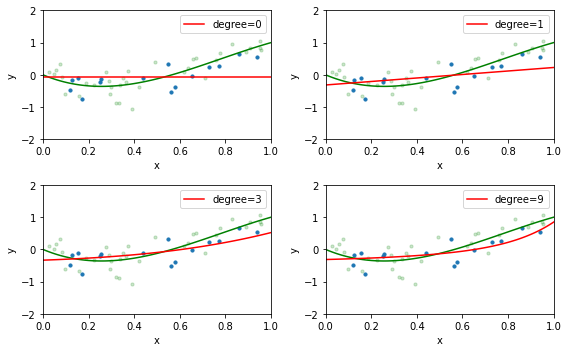

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# the ground truth - this is real function we'd like to uncover using polynomial regression. In a real situation this function is unknown.
def f(x): 
	return -(3*x)+(7*x**2)-(3*x**3)



X = np.random.uniform(0, 1, size=50)[:, np.newaxis] #sample 50 points from 0 to 1
y = f(X) + np.random.normal(scale=0.3, size=50)[:, np.newaxis] #generate labels for the randomly sampled points adding some Gaussian noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # split the data into a train and test subsets


# an auxiliary function to draw plots
def plot_approximation(est, ax, label=None):
    x = np.linspace(0,1,100) 
    ax.plot(x, f(x), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.scatter(X_test, y_test, s=10, color='green', alpha=0.2)
    ax.plot(x, est.predict(x[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')

# Use scikit-learn to generate polynomial regression models to draw detailed charts
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), Ridge())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='degree=%d' % degree)
plt.tight_layout()
plt.show()

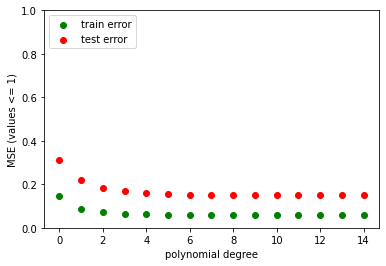

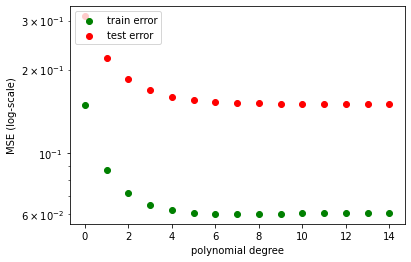

In [11]:
# Use scikit-learn to generate polynomial regression models to draw a summary chart
train_error = np.empty(15)
test_error = np.empty(15)
for degree in range(15):
    est = make_pipeline(PolynomialFeatures(degree), Ridge())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    
    

plt.scatter(np.arange(15), train_error, color='green', label='train error')
plt.scatter(np.arange(15), test_error, color='red', label='test error')
plt.ylim((0.0, 1e0))
plt.ylabel('MSE (values <= 1)')
plt.xlabel('polynomial degree')
plt.legend(loc = 'upper left')
plt.show()

plt.scatter(np.arange(15), train_error, color='green', label='train error')
plt.scatter(np.arange(15), test_error, color='red', label='test error')
plt.yscale('log')
plt.ylabel('MSE (log-scale)')
plt.xlabel('polynomial degree')
plt.legend(loc = 'upper left')
plt.show()

## Task 4

For high enough degrees of the polynomial, the error on the test set increases. Why is that?

The reason for that is overfitting. The higher the degree of the polynomial, the higher the interpolation precision on training data and the lower the performance on test data.

What is the purpose of using the test set?

To avoid overfitting. It provides another outlook to see how our algorithm does in the 'real world', checking if we selected the right set of hyperparameters, or only such that are coincidentally optimal for a particular training set but not for the general population.

## Task 5

Replace `LinearRegression` with `Ridge` and see how does using ridge regularization influences the error on the test set.
Observe the difference in the generated curves. Describe it, explain the reasons for it and comment whether the change is positive or negative.

The error on the test set decreased significantly, thus ridge regularization influences the error positively (for the trainer). The curves became much nicer and smoother, I'd even compare them to a ski slope. Clearly these changes are positive, since the overfitting isn't visible, even at high degrees.